In [1]:
import pandas as pd
pu = pd.read_csv('purchase_behaviour.csv')
tr = pd.read_csv('transaction_data.csv')

In [2]:
pu.tail()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget
72636,2373711,YOUNG SINGLES/COUPLES,Mainstream


In [3]:
tr.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
prod_dict = dict(zip(tr["PROD_NBR"], tr["PROD_NAME"]))

In [5]:
merged_df = pd.merge(tr, pu, on='LYLTY_CARD_NBR')
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [6]:
merged_df=merged_df.drop(['TXN_ID', 'PROD_NAME'], axis=1)
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PROD_NBR,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,5,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,66,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,61,2,2.9,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,69,5,15.0,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,108,3,13.8,MIDAGE SINGLES/COUPLES,Budget


In [7]:
merged_df.to_csv('merged_data.csv', index=False)

In [8]:
df = pd.read_csv('merged_data.csv')

# Customer Retention Analysis
repeat_customers = df["LYLTY_CARD_NBR"].value_counts()
repeat_customers_stats = {
    "Total Unique Customers": repeat_customers.count(),
    "Customers with More than 1 Purchase": (repeat_customers > 1).sum(),
    "Top Repeat Customers (Most Transactions)": repeat_customers.head(10),
}

# Product Affinity (Frequently Bought Together)
product_affinity = df.groupby(["PROD_NBR"])["LYLTY_CARD_NBR"].nunique().sort_values(ascending=False).head(10)

# Store-Level Performance Trends (Top & Bottom Performing Stores)
top_stores = df.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=False).head(10)
bottom_stores = df.groupby("STORE_NBR")["TOT_SALES"].sum().sort_values(ascending=True).head(10)

# Compile results
additional_insights = {
    "Customer Retention": repeat_customers_stats,
    "Frequently Bought Products (High Unique Buyers)": product_affinity,
    "Top Performing Stores": top_stores,
    "Bottom Performing Stores": bottom_stores,
}

additional_insights

{'Customer Retention': {'Total Unique Customers': 72637,
  'Customers with More than 1 Purchase': 53573,
  'Top Repeat Customers (Most Transactions)': LYLTY_CARD_NBR
  172032    18
  162039    18
  230078    17
  128178    17
  13138     17
  116181    17
  222242    16
  94185     16
  113080    16
  109036    16
  Name: count, dtype: int64},
 'Frequently Bought Products (High Unique Buyers)': PROD_NBR
 102    3215
 108    3213
 75     3186
 112    3182
 63     3179
 33     3171
 74     3164
 28     3154
 14     3149
 104    3145
 Name: LYLTY_CARD_NBR, dtype: int64,
 'Top Performing Stores': STORE_NBR
 226    18905.45
 88     16333.25
 165    15973.75
 40     15559.50
 237    15539.50
 58     15251.45
 199    14797.00
 4      14647.65
 203    14551.60
 26     14469.30
 Name: TOT_SALES, dtype: float64,
 'Bottom Performing Stores': STORE_NBR
 211      5.2
 76       6.0
 11       6.7
 252      7.4
 206      7.6
 92       9.2
 193     13.1
 85      13.9
 31      14.8
 117    161.8
 Name: 

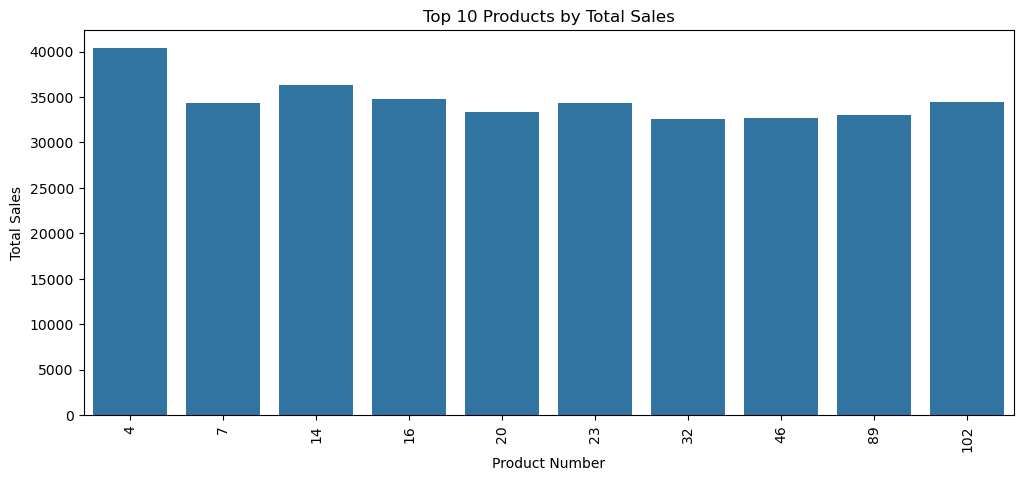

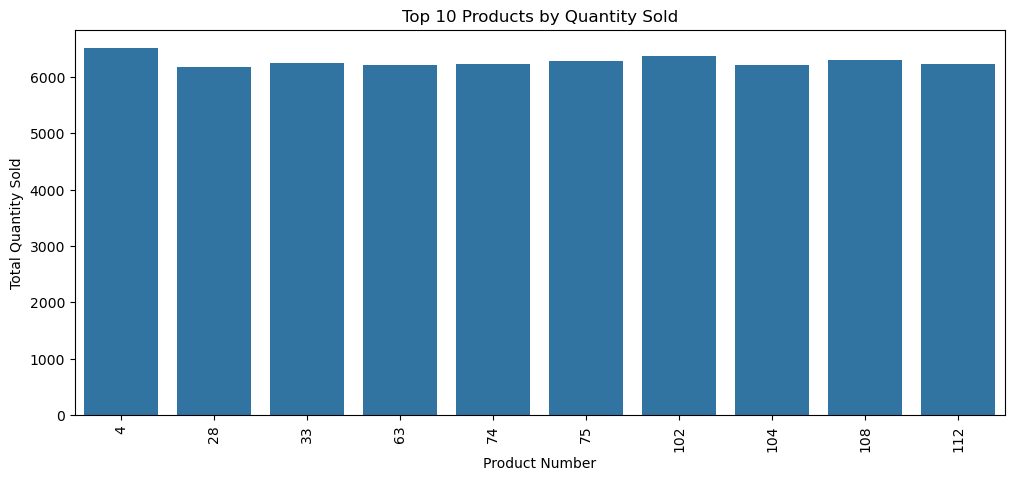

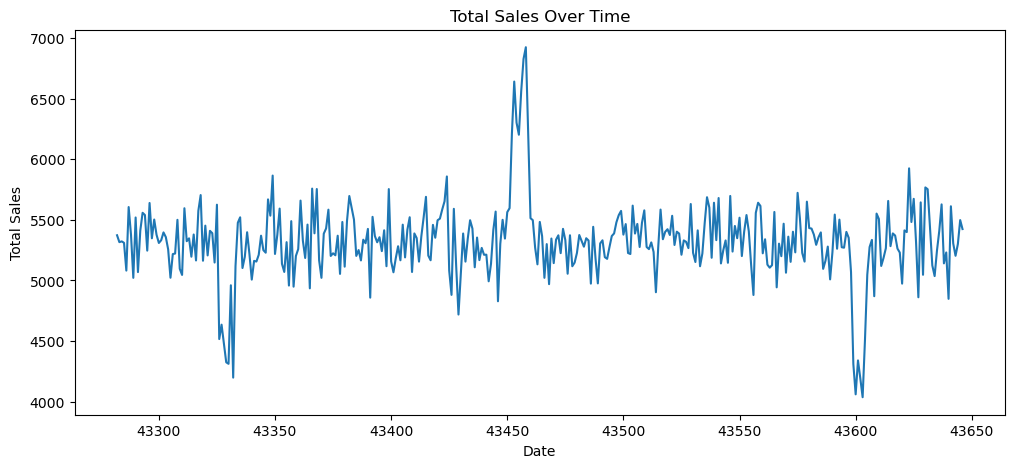

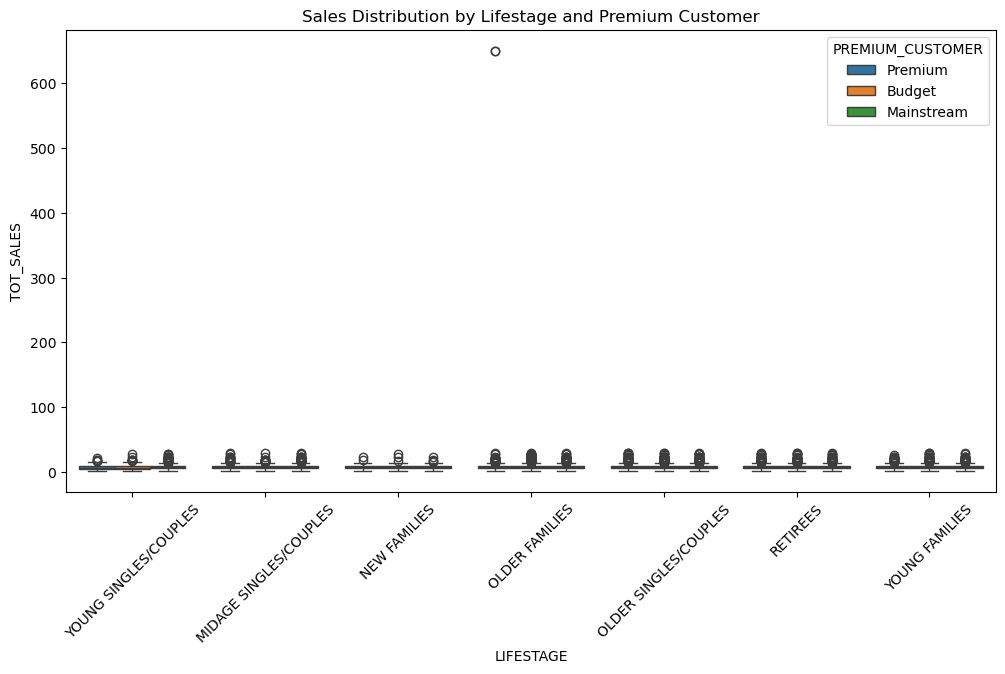

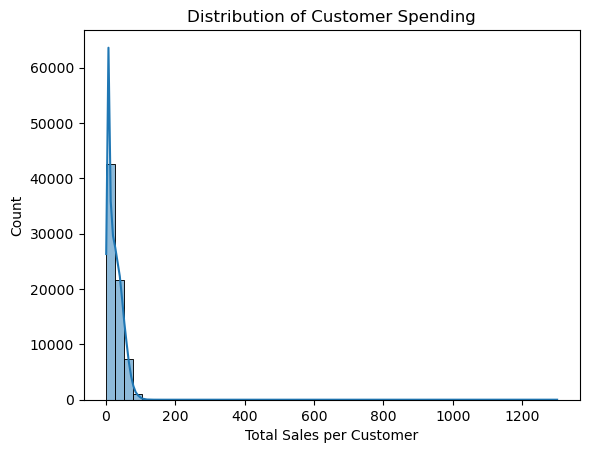

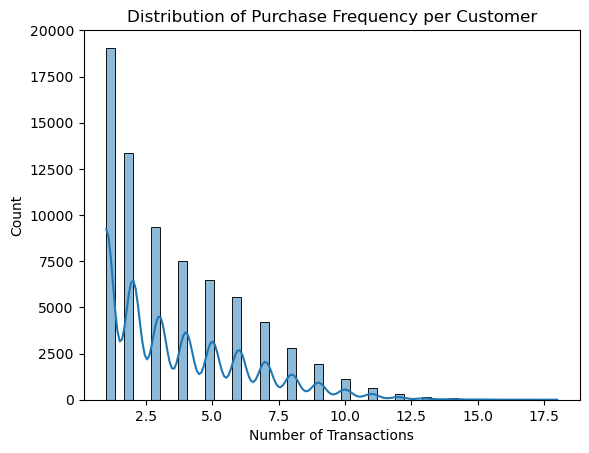

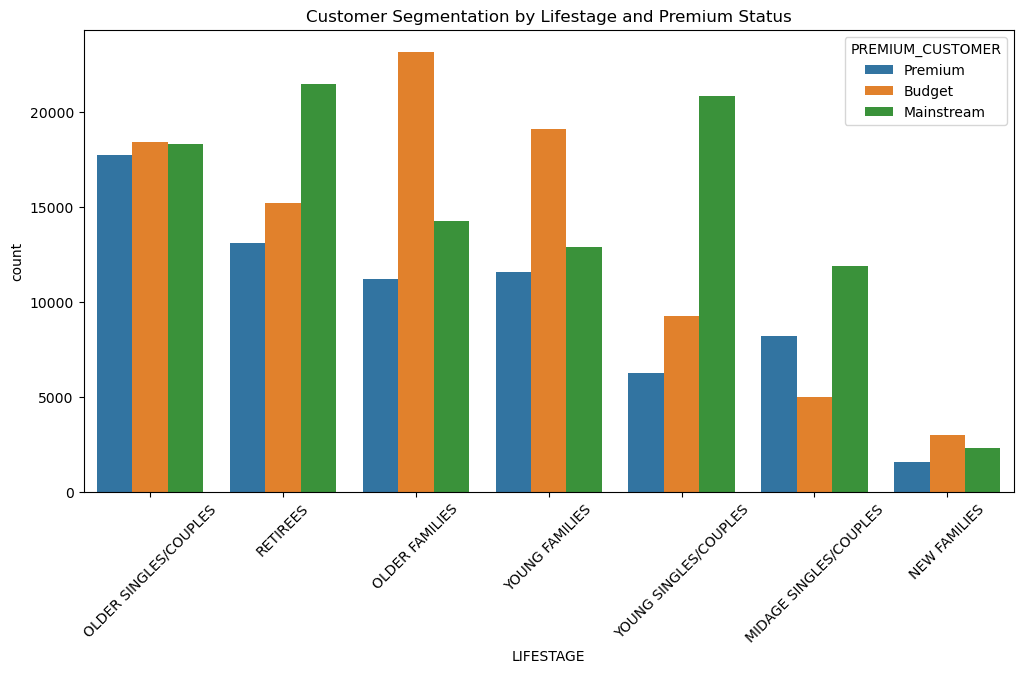

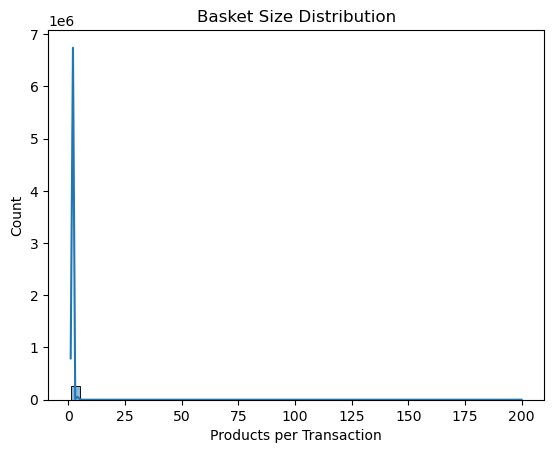

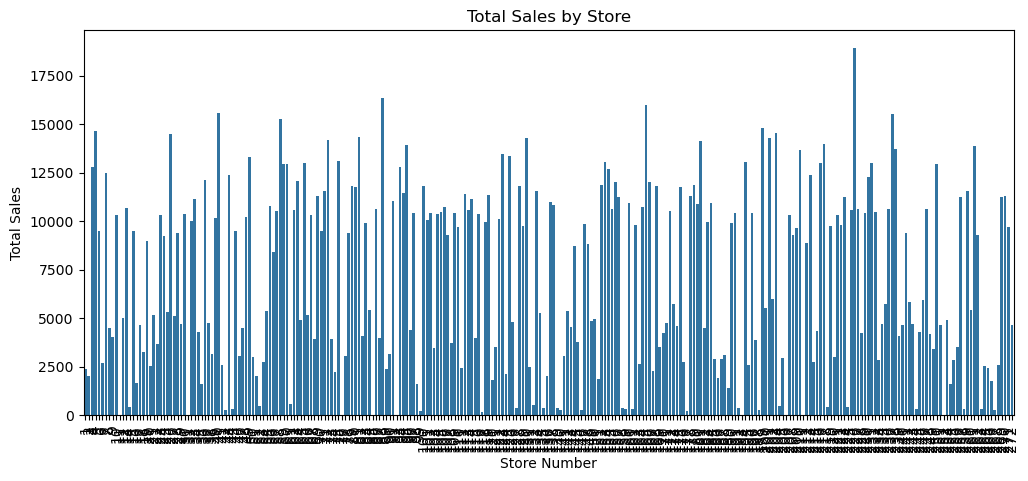

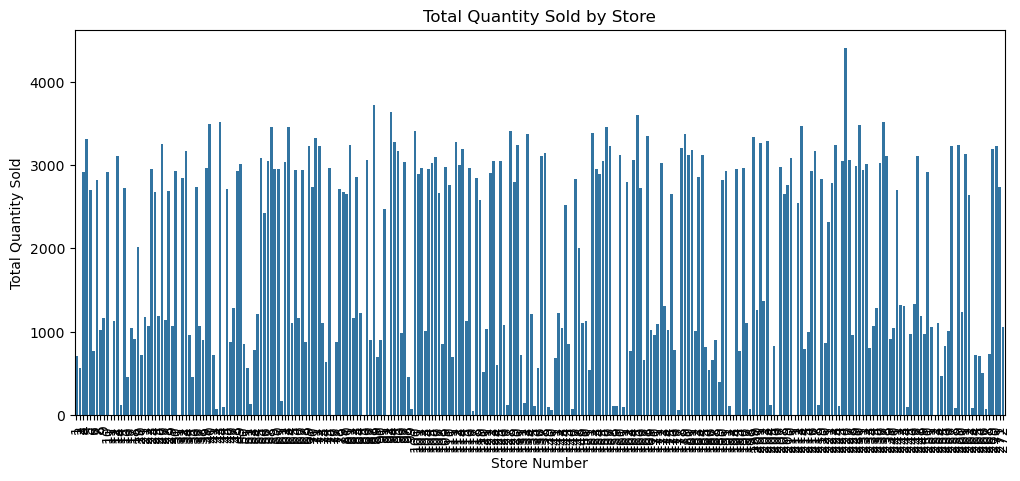

<Figure size 1200x500 with 0 Axes>

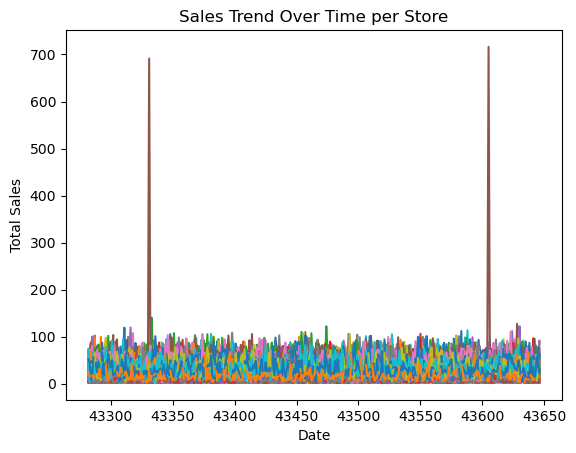

EDA Completed Successfully


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("merged_data.csv")

### PRODUCT-LEVEL ANALYSIS ###

# Total Sales per Product
product_sales = df.groupby('PROD_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=product_sales.index[:10], y=product_sales.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product Number")
plt.ylabel("Total Sales")
plt.show()

# Quantity Sold per Product
product_qty = df.groupby('PROD_NBR')['PROD_QTY'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=product_qty.index[:10], y=product_qty.values[:10])
plt.xticks(rotation=90)
plt.title("Top 10 Products by Quantity Sold")
plt.xlabel("Product Number")
plt.ylabel("Total Quantity Sold")
plt.show()

# Average Price per Unit per Product
df['Unit_Price'] = df['TOT_SALES'] / df['PROD_QTY']
product_price = df.groupby('PROD_NBR')['Unit_Price'].mean().sort_values(ascending=False)

# Sales Trend Over Time
plt.figure(figsize=(12,5))
df.groupby('DATE')['TOT_SALES'].sum().plot()
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

# Top-Selling Products by Lifestage & Premium Customer
plt.figure(figsize=(12,6))
sns.boxplot(x='LIFESTAGE', y='TOT_SALES', hue='PREMIUM_CUSTOMER', data=df)
plt.xticks(rotation=45)
plt.title("Sales Distribution by Lifestage and Premium Customer")
plt.show()

### CUSTOMER-CENTRIC ANALYSIS ###

# Total Spending per Customer
customer_sales = df.groupby('LYLTY_CARD_NBR')['TOT_SALES'].sum()
sns.histplot(customer_sales, bins=50, kde=True)
plt.title("Distribution of Customer Spending")
plt.xlabel("Total Sales per Customer")
plt.ylabel("Count")
plt.show()

# Purchase Frequency per Customer
customer_freq = df.groupby('LYLTY_CARD_NBR').size()
sns.histplot(customer_freq, bins=50, kde=True)
plt.title("Distribution of Purchase Frequency per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Count")
plt.show()

# Preferred Products per Customer Segment
plt.figure(figsize=(12,6))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=df, order=df['LIFESTAGE'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Customer Segmentation by Lifestage and Premium Status")
plt.show()

# Basket Size Distribution
basket_size = df.groupby(['LYLTY_CARD_NBR', 'DATE'])['PROD_QTY'].sum()
sns.histplot(basket_size, bins=50, kde=True)
plt.title("Basket Size Distribution")
plt.xlabel("Products per Transaction")
plt.ylabel("Count")
plt.show()

### STORE-LEVEL ANALYSIS ###

# Total Sales per Store
store_sales = df.groupby('STORE_NBR')['TOT_SALES'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=store_sales.index, y=store_sales.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")
plt.show()

# Quantity Sold per Store
store_qty = df.groupby('STORE_NBR')['PROD_QTY'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,5))
sns.barplot(x=store_qty.index, y=store_qty.values)
plt.xticks(rotation=90)
plt.title("Total Quantity Sold by Store")
plt.xlabel("Store Number")
plt.ylabel("Total Quantity Sold")
plt.show()

# Sales Trend Over Time per Store
plt.figure(figsize=(12,5))
df.groupby(['DATE', 'STORE_NBR'])['TOT_SALES'].sum().unstack().plot(legend=False)
plt.title("Sales Trend Over Time per Store")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

print("EDA Completed Successfully")


In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("merged_data.csv")

### PRODUCT-LEVEL ANALYSIS ###

# Top 3 Products by Overall Sales
top_products_overall = df.groupby('PROD_NBR')['TOT_SALES'].sum().nlargest(3)
print("Top 3 Products by Overall Sales:")
print(top_products_overall)

# Top 3 Stores by Total Sales
top_stores = df.groupby('STORE_NBR')['TOT_SALES'].sum().nlargest(3)
print("Top 3 Stores by Total Sales:")
print(top_stores)

# Top 2 Products in Each of the Top 3 Stores
top_store_products = df[df['STORE_NBR'].isin(top_stores.index)].groupby(['STORE_NBR', 'PROD_NBR'])['TOT_SALES'].sum().groupby(level=0, group_keys=False).nlargest(3)
print("Top 3 Products in Each of the Top 3 Stores:")
print(top_store_products)

# Top 3 Products by Sales for Each Lifestage
top_products_per_lifestage = df.groupby(['LIFESTAGE', 'PROD_NBR'])['TOT_SALES'].sum().groupby(level=0, group_keys=False).nlargest(3)
print("Top 3 Products by Sales for Each Lifestage:")
print(top_products_per_lifestage)

# Top 3 Products by Sales for Each Premium Customer Type
top_products_per_premium = df.groupby(['PREMIUM_CUSTOMER', 'PROD_NBR'])['TOT_SALES'].sum().groupby(level=0, group_keys=False).nlargest(3)
print("Top 3 Products by Sales for Each Premium Customer Type:")
print(top_products_per_premium)

Top 3 Products by Overall Sales:
PROD_NBR
4     40352.0
14    36367.6
16    34804.2
Name: TOT_SALES, dtype: float64
Top 3 Stores by Total Sales:
STORE_NBR
226    18905.45
88     16333.25
165    15973.75
Name: TOT_SALES, dtype: float64
Top 3 Products in Each of the Top 3 Stores:
STORE_NBR  PROD_NBR
88         102          426.60
           7            410.40
           23           399.00
165        4            490.75
           23           461.70
           14           442.50
226        4           1803.75
           16           495.90
           14           472.00
Name: TOT_SALES, dtype: float64
Top 3 Products by Sales for Each Lifestage:
LIFESTAGE               PROD_NBR
MIDAGE SINGLES/COUPLES  14          3746.50
                        23          3648.00
                        4           3646.50
NEW FAMILIES            4           1088.75
                        88          1063.80
                        14          1008.90
OLDER FAMILIES          4           7982.00
     

In [11]:
import pandas as pd

# Load your data (replace 'your_data.csv' with the actual file path)
df = pd.read_csv('merged_data.csv')

# Group by LIFESTAGE and calculate total sales and product quantities
lifestage_sales = df.groupby('LIFESTAGE').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index()

# Sort by total sales and get the top 3 LIFESTAGE categories
top_3_lifestages = lifestage_sales.sort_values(by='total_sales', ascending=False).head(3)

# For each of the top 3 LIFESTAGE categories, find the most popular products and premium customer type
for lifestage in top_3_lifestages['LIFESTAGE']:
    lifestage_data = df[df['LIFESTAGE'] == lifestage]
    most_popular_products = lifestage_data.groupby('PROD_NBR').agg(
        total_sales=('TOT_SALES', 'sum')
    ).reset_index().sort_values(by='total_sales', ascending=False).head(3)
    
    premium_customer_type = lifestage_data['PREMIUM_CUSTOMER'].mode()[0]
    
    print(f"Lifestage: {lifestage}")
    print("Most Popular Products:")
    print(most_popular_products[['PROD_NBR', 'total_sales']])
    print(f"Premium Customer Type: {premium_customer_type}")
    print("-" * 50)


Lifestage: OLDER SINGLES/COUPLES
Most Popular Products:
    PROD_NBR  total_sales
3          4      8459.75
13        14      7528.40
15        16      7182.00
Premium Customer Type: Budget
--------------------------------------------------
Lifestage: RETIREES
Most Popular Products:
     PROD_NBR  total_sales
3           4       7527.0
13         14       7026.9
101       102       6933.6
Premium Customer Type: Mainstream
--------------------------------------------------
Lifestage: OLDER FAMILIES
Most Popular Products:
    PROD_NBR  total_sales
3          4       7982.0
15        16       6549.3
6          7       6247.2
Premium Customer Type: Budget
--------------------------------------------------


In [13]:
# Group by LYLTY_CARD_NBR to find the top 10 customers by total sales
top_10_customers = df.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index().sort_values(by='total_sales', ascending=False).head(5)

# For each of the top 10 customers, analyze their behavior
for customer in top_10_customers['LYLTY_CARD_NBR']:
    customer_data = df[df['LYLTY_CARD_NBR'] == customer]
    
    # Products they buy
    products_bought = customer_data.groupby('PROD_NBR').agg(
        total_sales=('TOT_SALES', 'sum')
    ).reset_index().sort_values(by='total_sales', ascending=False).head(5)
    
    # Stores they visit
    stores_visited = customer_data['STORE_NBR'].unique()
    
    # Their premium customer type
    premium_type = customer_data['PREMIUM_CUSTOMER'].mode()[0]

    lifestage_type = customer_data['LIFESTAGE'].mode()[0]
    
    # Retention rate (assuming retention is based on unique visits or frequency of purchases)
    visits_count = customer_data['DATE'].nunique()  # Number of unique days visited
    retention_rate = visits_count / len(df['DATE'].unique())  # Assuming retention rate based on days visited
    
    print(f"Customer: {customer}")
    print("Products Bought:")
    print(products_bought[['PROD_NBR', 'total_sales']])
    print(f"Stores Visited: {stores_visited}")
    print(f"Premium Customer Type: {premium_type}")
    print(f"Lifestage Type: {lifestage_type}")
    print(f"Retention Rate: {retention_rate:.2f}")
    print("-" * 50)


Customer: 226000
Products Bought:
   PROD_NBR  total_sales
0         4       1300.0
Stores Visited: [226]
Premium Customer Type: Premium
Lifestage Type: OLDER FAMILIES
Retention Rate: 0.01
--------------------------------------------------
Customer: 230078
Products Bought:
    PROD_NBR  total_sales
4         17         18.4
8         68         14.8
2          7         11.4
13        88         10.8
3         15          9.2
Stores Visited: [230]
Premium Customer Type: Budget
Lifestage Type: OLDER FAMILIES
Retention Rate: 0.05
--------------------------------------------------
Customer: 63197
Products Bought:
    PROD_NBR  total_sales
9         84         21.7
7         71         12.9
0         14         11.8
2         16         11.4
10       102         10.8
Stores Visited: [63]
Premium Customer Type: Budget
Lifestage Type: OLDER FAMILIES
Retention Rate: 0.04
--------------------------------------------------
Customer: 259009
Products Bought:
    PROD_NBR  total_sales
11        88

In [14]:
# Total sales per customer (LYLTY_CARD_NBR)
customer_sales = df.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum'),
    purchase_count=('LYLTY_CARD_NBR', 'count')  # Count of transactions
).reset_index()

# Sort by total sales to find the most profitable customers
most_profitable_customers = customer_sales.sort_values(by='total_sales', ascending=False).head(10)
print(most_profitable_customers)

# Customer purchase frequency
customer_sales['purchase_frequency'] = customer_sales['purchase_count'] / df['DATE'].nunique()


       LYLTY_CARD_NBR  total_sales  total_qty  purchase_count
59694          226000      1300.00        400               2
60925          230078       138.60         36              17
17292           63197       132.80         32              15
69017          259009       127.20         30              15
42813          162039       126.80         36              18
16001           58361       124.80         28              14
61001          230154       124.40         32              14
25958           94185       122.80         32              16
35338          130090       122.65         27              14
47959          179228       120.80         32              16


In [15]:
# Analyze how different premium customer types contribute to sales
premium_sales = df.groupby('PREMIUM_CUSTOMER').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index()

# Sales by lifestage
lifestage_sales = df.groupby('LIFESTAGE').agg(
    total_sales=('TOT_SALES', 'sum'),
    total_qty=('PROD_QTY', 'sum')
).reset_index()

print(premium_sales)
print(lifestage_sales)


  PREMIUM_CUSTOMER  total_sales  total_qty
0           Budget    676211.55     177898
1       Mainstream    750744.50     193965
2          Premium    507458.95     133261
                LIFESTAGE  total_sales  total_qty
0  MIDAGE SINGLES/COUPLES    184751.30      47721
1            NEW FAMILIES     50433.45      12847
2          OLDER FAMILIES    353767.20      94992
3   OLDER SINGLES/COUPLES    402426.75     104203
4                RETIREES    366470.90      94166
5          YOUNG FAMILIES    316160.10      84561
6   YOUNG SINGLES/COUPLES    260405.30      66634


In [16]:
# Identify repeat customers vs. one-time buyers
customer_purchase_counts = df.groupby("LYLTY_CARD_NBR")["DATE"].count()
repeat_customers = (customer_purchase_counts > 1).sum()
one_time_customers = (customer_purchase_counts == 1).sum()

# Total customers
total_customers = df["LYLTY_CARD_NBR"].nunique()

# Display results
print(f"Repeat Customers: {repeat_customers}")
print(f"One-Time Customers: {one_time_customers}")

Repeat Customers: 53573
One-Time Customers: 19064


In [17]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
df = pd.read_csv("merged_data.csv")
# Convert DATE to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], origin="1899-12-30", unit="D")

# Reduce memory usage: Use a 10% sample (optional, but helps prevent crashes)
df_sample = df.sample(frac=0.1, random_state=42)

# Filter products that are purchased frequently (e.g., more than 5 times)
product_counts = df_sample["PROD_NBR"].value_counts()
top_products = product_counts[product_counts > 5].index  # Keep products appearing > 5 times
df_filtered = df_sample[df_sample["PROD_NBR"].isin(top_products)]

# Create a transaction dataset (each row = one customer, columns = products)
basket = df_filtered.groupby(["LYLTY_CARD_NBR", "PROD_NBR"])["PROD_QTY"].sum().unstack().fillna(0)

# Convert values to 1 (if purchased) or 0 (not purchased)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets (lower min_support if needed)
frequent_itemsets = apriori(basket, min_support=0.0001, use_colnames=True)  # Adjust min_support

# Check if frequent itemsets are found
if frequent_itemsets.empty:
    print("No frequent itemsets found. Try lowering min_support further.")
else:
    # Generate association rules (lower min_threshold if needed)
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Check if rules are generated
    if rules.empty:
        print("No association rules found. Try lowering min_threshold.")
    else:
        # Display top 10 rules sorted by lift (strongest associations first)
        print(rules.sort_values("lift", ascending=False).head(10))

/var/folders/qr/80j1cy4s5q542dmdc5lwzzqc0000gn/T/ipykernel_59642/2667613501.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/opt/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    antecedents consequents  antecedent support  consequent support   support  \
319        (66)        (97)            0.006372            0.006372  0.000187   
318        (97)        (66)            0.006372            0.006372  0.000187   
252        (56)        (45)            0.006278            0.006700  0.000187   
253        (45)        (56)            0.006700            0.006278  0.000187   
320        (66)       (111)            0.006372            0.006887  0.000187   
321       (111)        (66)            0.006887            0.006372  0.000187   
335        (92)        (73)            0.006747            0.006653  0.000187   
334        (73)        (92)            0.006653            0.006747  0.000187   
305        (61)        (98)            0.007449            0.006138  0.000187   
304        (98)        (61)            0.006138            0.007449  0.000187   

     confidence      lift  representativity  leverage  conviction  \
319    0.029412  4.615917              

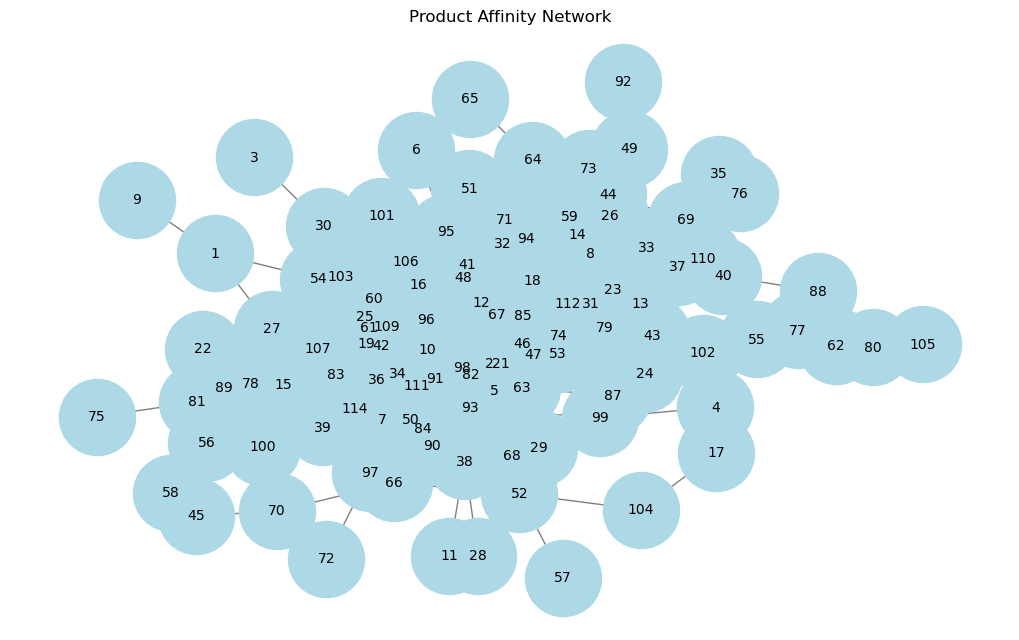

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.from_pandas_edgelist(rules, 'antecedents', 'consequents', ['lift'])
plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
plt.title("Product Affinity Network")
plt.show()


In [16]:
#Top 3 products
p1 = prod_dict[4]
p2 = prod_dict[14]
p3 = prod_dict[16]
print(f"Top 3 products:\n{p1},\n{p2},\n{p3}")

Top 3 products:
Dorito Corn Chp     Supreme 380g,
Smiths Crnkle Chip  Orgnl Big Bag 380g,
Smiths Crinkle Chips Salt & Vinegar 330g


In [23]:
# Aggregate total sales per customer
customer_sales = df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum()

# Determine the number of customers in the top 10%
num_top_customers = int(len(customer_sales) * 0.10)

# Get the top 10% most profitable customers
top_10_percent_customers = customer_sales.nlargest(num_top_customers).reset_index()

# Analyze distribution by LIFESTAGE and PREMIUM_CUSTOMER
top_10_segment_distribution = (
    top_10_percent_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .size()
    .reset_index(name="COUNT")
    .sort_values(by="COUNT", ascending=False)
)

# Display results
print("Top 10% Most Profitable Customer Segment Distribution:\n")
print(top_10_segment_distribution)


Top 10% Most Profitable Customer Segment Distribution:

                 LIFESTAGE PREMIUM_CUSTOMER  COUNT
6           OLDER FAMILIES           Budget   1177
15          YOUNG FAMILIES           Budget    976
7           OLDER FAMILIES       Mainstream    766
16          YOUNG FAMILIES       Mainstream    579
17          YOUNG FAMILIES          Premium    569
8           OLDER FAMILIES          Premium    569
9    OLDER SINGLES/COUPLES           Budget    355
10   OLDER SINGLES/COUPLES       Mainstream    336
11   OLDER SINGLES/COUPLES          Premium    324
19   YOUNG SINGLES/COUPLES       Mainstream    314
1   MIDAGE SINGLES/COUPLES       Mainstream    265
13                RETIREES       Mainstream    262
12                RETIREES           Budget    199
2   MIDAGE SINGLES/COUPLES          Premium    162
14                RETIREES          Premium    152
18   YOUNG SINGLES/COUPLES           Budget    100
0   MIDAGE SINGLES/COUPLES           Budget     70
20   YOUNG SINGLES/COUPLES

In [24]:
# Calculate purchase frequency per customer
purchase_frequency = df.groupby("LYLTY_CARD_NBR")["DATE"].count().reset_index()
purchase_frequency.rename(columns={"DATE": "TOTAL_PURCHASES"}, inplace=True)

# Calculate total spending per customer
total_spending = df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
total_spending.rename(columns={"TOT_SALES": "TOTAL_SPENT"}, inplace=True)

# Merge both metrics
loyalty_df = pd.merge(purchase_frequency, total_spending, on="LYLTY_CARD_NBR")

# Identify the most loyal customers based on high frequency and high spending
loyalty_df = loyalty_df.sort_values(by=["TOTAL_PURCHASES", "TOTAL_SPENT"], ascending=[False, False])

# Display the top 10 most loyal customers
print(loyalty_df.head(10))

       LYLTY_CARD_NBR  TOTAL_PURCHASES  TOTAL_SPENT
42813          162039               18        126.8
45905          172032               18        120.1
60925          230078               17        138.6
31654          116181               17        117.6
3686            13138               17        109.0
34943          128178               17         99.7
25958           94185               16        122.8
47959          179228               16        120.8
6530            23192               16        114.7
28605          105026               16        114.2


In [42]:
import pandas as pd

# Load dataset
file_path = "merged_data.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Convert DATE column to datetime format
df["DATE"] = pd.to_datetime(df["DATE"], origin="1899-12-30", unit="D")  # Adjust if needed

# Calculate Recency (days since last purchase)
latest_date = df["DATE"].max()
recency = df.groupby("LYLTY_CARD_NBR")["DATE"].max().reset_index()
recency["RECENCY"] = (latest_date - recency["DATE"]).dt.days

# Calculate Frequency (total number of purchases)
frequency = df.groupby("LYLTY_CARD_NBR")["DATE"].count().reset_index()
frequency.rename(columns={"DATE": "FREQUENCY"}, inplace=True)

# Calculate Monetary (total spending per customer)
monetary = df.groupby("LYLTY_CARD_NBR")["TOT_SALES"].sum().reset_index()
monetary.rename(columns={"TOT_SALES": "MONETARY"}, inplace=True)

# Merge all metrics into one DataFrame
rfm = recency.merge(frequency, on="LYLTY_CARD_NBR").merge(monetary, on="LYLTY_CARD_NBR")

# Assign scores using ranked data to handle duplicate bin edges
# For Recency: lower values are better
rfm["R_SCORE"] = pd.qcut(rfm["RECENCY"], q=5, labels=[5, 4, 3, 2, 1])
# For Frequency and Monetary: use ranking to ensure unique bins
rfm["F_SCORE"] = pd.qcut(rfm["FREQUENCY"].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])
rfm["M_SCORE"] = pd.qcut(rfm["MONETARY"].rank(method='first'), q=5, labels=[1, 2, 3, 4, 5])

# Calculate final RFM score
rfm["RFM_SCORE"] = rfm["R_SCORE"].astype(int) + rfm["F_SCORE"].astype(int) + rfm["M_SCORE"].astype(int)

# Get top 10 most loyal customers (highest RFM scores)
top_loyal_customers = rfm.sort_values(by="RFM_SCORE", ascending=False).head(20)

# Display results
print(top_loyal_customers)

       LYLTY_CARD_NBR       DATE  RECENCY  FREQUENCY  MONETARY R_SCORE  \
18863           69039 2019-06-15       15          8     50.85       5   
15554           57170 2019-06-22        8         14    106.60       5   
50958          190131 2019-06-23        7          6     45.80       5   
15539           57155 2019-06-19       11          9     54.40       5   
6566            23228 2019-06-23        7          7     46.60       5   
42900          162126 2019-06-18       12          8     54.00       5   
6557            23219 2019-06-14       16          9     56.40       5   
6556            23218 2019-06-09       21         10     71.80       5   
50964          190137 2019-06-09       21          9     59.60       5   
15550           57166 2019-06-13       17         11     78.30       5   
20906           75299 2019-06-19       11         10     97.60       5   
50966          190139 2019-06-11       19         10     76.00       5   
6543            23205 2019-06-17      

In [43]:
rfm['RFM_SCORE'].value_counts()

RFM_SCORE
13    6289
4     6027
7     5798
11    5798
8     5673
12    5671
10    5585
5     5584
14    5493
6     5467
9     5418
3     4934
15    4900
Name: count, dtype: int64

In [48]:
loyal_customers = rfm[rfm["RFM_SCORE"] == 15]

# Merge with the original dataset to get segment details
customer_segments = df[["LYLTY_CARD_NBR", "PREMIUM_CUSTOMER", "LIFESTAGE"]].drop_duplicates()
loyal_customers_segments = loyal_customers.merge(customer_segments, on="LYLTY_CARD_NBR", how="left")

# Count customers per segment
segment_counts = loyal_customers_segments.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).size().reset_index(name="COUNT").sort_values(by="COUNT", ascending=False)

# Display results
print("Top 10% Most Loyal Customer Segment Distribution:\n")
print(segment_counts)

Top 10% Most Loyal Customer Segment Distribution:

   PREMIUM_CUSTOMER               LIFESTAGE  COUNT
2            Budget          OLDER FAMILIES    747
5            Budget          YOUNG FAMILIES    631
9        Mainstream          OLDER FAMILIES    471
12       Mainstream          YOUNG FAMILIES    388
16          Premium          OLDER FAMILIES    359
19          Premium          YOUNG FAMILIES    348
3            Budget   OLDER SINGLES/COUPLES    269
10       Mainstream   OLDER SINGLES/COUPLES    235
13       Mainstream   YOUNG SINGLES/COUPLES    229
17          Premium   OLDER SINGLES/COUPLES    218
11       Mainstream                RETIREES    210
7        Mainstream  MIDAGE SINGLES/COUPLES    181
4            Budget                RETIREES    142
18          Premium                RETIREES    125
14          Premium  MIDAGE SINGLES/COUPLES    125
6            Budget   YOUNG SINGLES/COUPLES     81
0            Budget  MIDAGE SINGLES/COUPLES     66
20          Premium   YOUNG SIN